In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
plt = reload(plt)
from datetime import date
import datetime as dt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [2]:
off_train = pd.read_csv('ccf_offline_stage1_train.csv',keep_default_na=True)
off_train.columns = ['user_id','merchant_id','coupon_id','discount_rate','distance','date_received','date']
off_test = pd.read_csv('ccf_offline_stage1_test_revised.csv',keep_default_na=True)
off_test.columns = ['user_id','merchant_id','coupon_id','discount_rate','distance','date_received']
on_train = pd.read_csv('ccf_online_stage1_train.csv',keep_default_na=True)
on_train.columns = ['user_id','merchant_id','action','coupon_id','discount_rate','date_received','date']
off_train[['user_id','merchant_id','coupon_id']] = off_train[['user_id','merchant_id','coupon_id']].astype(str)
off_test[['user_id','merchant_id','coupon_id']] = off_test[['user_id','merchant_id','coupon_id']].astype(str)
on_train[['user_id','merchant_id','coupon_id']] = on_train[['user_id','merchant_id','coupon_id']].astype(str)

In [3]:
off_train.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date
0,1439408,2632,nan,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


In [4]:
on_train.head()

,user_id,merchant_id,action,coupon_id,discount_rate,date_received,date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,nan,NaN,NaN,20160321.0
2,14336199,18907,0,nan,NaN,NaN,20160618.0
3,14336199,18907,0,nan,NaN,NaN,20160618.0
4,14336199,18907,0,nan,NaN,NaN,20160618.0


In [5]:
off_test.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received
0,4129537,450,9983,30:5,1.0,20160712
1,6949378,1300,3429,30:5,NaN,20160706
2,2166529,7113,6928,200:20,5.0,20160727
3,2166529,7113,1808,100:10,5.0,20160727
4,6172162,7605,6500,30:1,2.0,20160708


In [6]:
off_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   merchant_id    object 
 2   coupon_id      object 
 3   discount_rate  object 
 4   distance       float64
 5   date_received  float64
 6   date           float64
dtypes: float64(3), object(4)
memory usage: 93.7+ MB


Discount_rate: range in [0,1], 'fixed' means Limited Time Offer;
Distance (only in off_train): 500x, the distance from the nearest shop around the user for locations in which a user is most active. x range in [0,10]; 0 – less than 500 meters; 10 – more than 5 kilometres.

In [7]:
on_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11429826 entries, 0 to 11429825
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   merchant_id    object 
 2   action         int64  
 3   coupon_id      object 
 4   discount_rate  object 
 5   date_received  float64
 6   date           float64
dtypes: float64(2), int64(1), object(4)
memory usage: 610.4+ MB


action (only in on_train): 0 - click, 1 - buy, 2 - getcoupon

In [8]:
off_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113640 entries, 0 to 113639
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   user_id        113640 non-null  object 
 1   merchant_id    113640 non-null  object 
 2   coupon_id      113640 non-null  object 
 3   discount_rate  113640 non-null  object 
 4   distance       101576 non-null  float64
 5   date_received  113640 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 5.2+ MB


In [9]:
off_train.describe()

,distance,date_received,date
count,1.648881e+06,1.053282e+06,7.769840e+05
mean,2.361636e+00,2.016032e+07,2.016040e+07
std,3.483974e+00,1.771416e+02,1.621500e+02
min,0.000000e+00,2.016010e+07,2.016010e+07
25%,0.000000e+00,2.016013e+07,2.016031e+07
50%,0.000000e+00,2.016032e+07,2.016042e+07
75%,3.000000e+00,2.016051e+07,2.016052e+07
max,1.000000e+01,2.016062e+07,2.016063e+07


In [10]:
on_train.describe()

,action,date_received,date
count,1.142983e+07,8.723570e+05,1.077393e+07
mean,2.348193e-01,2.016037e+07,2.016039e+07
std,5.426314e-01,1.560031e+02,1.732371e+02
min,0.000000e+00,2.016010e+07,2.016010e+07
25%,0.000000e+00,2.016023e+07,2.016023e+07
50%,0.000000e+00,2.016040e+07,2.016041e+07
75%,0.000000e+00,2.016051e+07,2.016052e+07
max,2.000000e+00,2.016062e+07,2.016063e+07


In [11]:
off_test.describe()

,distance,date_received
count,101576.000000,1.136400e+05
mean,2.328040,2.016072e+07
std,3.260755,9.019508e+00
min,0.000000,2.016070e+07
25%,0.000000,2.016071e+07
50%,1.000000,2.016072e+07
75%,3.000000,2.016072e+07
max,10.000000,2.016073e+07


In [12]:
off_train.isnull().sum()

user_id               0
merchant_id           0
coupon_id             0
discount_rate    701602
distance         106003
date_received    701602
date             977900
dtype: int64

In [13]:
on_train.isnull().sum()

user_id                 0
merchant_id             0
action                  0
coupon_id               0
discount_rate    10557469
date_received    10557469
date               655898
dtype: int64

In [14]:
off_test.isnull().sum()

user_id              0
merchant_id          0
coupon_id            0
discount_rate        0
distance         12064
date_received        0
dtype: int64

In [15]:
# find the range of date of the data
off_train = pd.read_csv('ccf_offline_stage1_train.csv',keep_default_na=False)
off_train.columns = ['user_id','merchant_id','coupon_id','discount_rate','distance','date_received','date']
off_test = pd.read_csv('ccf_offline_stage1_test_revised.csv',keep_default_na=False)
off_test.columns = ['user_id','merchant_id','coupon_id','discount_rate','distance','date_received']
on_train = pd.read_csv('ccf_online_stage1_train.csv',keep_default_na=False)
on_train.columns = ['user_id','merchant_id','action','coupon_id','discount_rate','date_received','date']
off_train[['user_id','merchant_id','coupon_id']] = off_train[['user_id','merchant_id','coupon_id']].astype(str)
off_test[['user_id','merchant_id','coupon_id']] = off_test[['user_id','merchant_id','coupon_id']].astype(str)
on_train[['user_id','merchant_id','coupon_id']] = on_train[['user_id','merchant_id','coupon_id']].astype(str)

In [16]:
print('offline train date_received')
print(off_train[off_train['date_received']!='null']['date_received'].min())
print(off_train[off_train['date_received']!='null']['date_received'].max())

print('online train date_received')
print(on_train[on_train['date_received']!='null']['date_received'].min())
print(on_train[on_train['date_received']!='null']['date_received'].max())

print('test date_received')
print(off_test['date_received'].min())
print(off_test['date_received'].max())

offline train date_received
20160101
20160615
online train date_received
20160101
20160615
test date_received
20160701
20160731


In [17]:
print('offline train date')
print(off_train[off_train['date']!='null']['date'].min())
print(off_train[off_train['date']!='null']['date'].max())

print('online train date')
print(on_train[on_train['date']!='null']['date'].min())
print(on_train[on_train['date']!='null']['date'].max())

offline train date
20160101
20160630
online train date
20160101
20160630


In [18]:
# check the user_id in online/offline training set and testing set
off_train_user = off_train[['user_id']].copy().drop_duplicates()
off_test_user = off_test[['user_id']].copy().drop_duplicates()
on_train_user = on_train[['user_id']].copy().drop_duplicates()
print ('offline training set, number of user_ids')
print (off_train_user.user_id.count())
print ('online training set, number of user_ids')
print (on_train_user.user_id.count())
print ('offline testing set, number of user_ids')
print (off_test_user.user_id.count())
off_train_user['off_train_flag'] = 1
off_merge = off_test_user.merge(off_train_user,on='user_id', how="left").reset_index().fillna(0)
print ('offline training set and testing set, number of repeated user_ids')
print(off_merge['off_train_flag'].sum())
print ('offline training set and testing set, number of repeated user_ids over number of user_ids in the testing set')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())
on_train_user['on_train_flag'] = 1
on_merge = off_test_user.merge(on_train_user,on = 'user_id', how = "left").reset_index().fillna(0)
print ('online training set and testing set, number of repeated user_ids')
print(on_merge['on_train_flag'].sum())
print ('online training set and testing set, number of repeated user_ids over number of user_ids in the testing set')
print(on_merge['on_train_flag'].sum()/on_merge['on_train_flag'].count())

offline training set, number of user_ids
539438
online training set, number of user_ids
762858
offline testing set, number of user_ids
76309
offline training set and testing set, number of repeated user_ids
76307.0
offline training set and testing set, number of repeated user_ids over number of user_ids in the testing set
0.9999737907717308
online training set and testing set, number of repeated user_ids
43155.0
online training set and testing set, number of repeated user_ids over number of user_ids in the testing set
0.5655296229802513


In [19]:
# check the merchant_id in online/offline training set and testing set
off_train_merchant = off_train[['merchant_id']].copy().drop_duplicates()
off_test_merchant = off_test[['merchant_id']].copy().drop_duplicates()
on_train_merchant = on_train[['merchant_id']].copy().drop_duplicates()
print ('offline training set, number of merchant_ids')
print (off_train_merchant.merchant_id.count())
print ('online training set, number of merchant_ids')
print (on_train_merchant.merchant_id.count())
print ('offline testing set, number of merchant_ids')
print (off_test_merchant.merchant_id.count())

off_train_merchant['off_train_flag'] = 1
off_merge = off_test_merchant.merge(off_train_merchant,on='merchant_id', how="left").reset_index().fillna(0)
print ('offline training set and testing set, number of repeated merchant_ids')
print(off_merge['off_train_flag'].sum())
print ('offline training set and testing set, number of repeated merchant_ids over number of merchant_ids in the testing set')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())

on_train_merchant['on_train_flag'] = 1
on_merge = off_test_merchant.merge(on_train_merchant,on='merchant_id', how="left").reset_index().fillna(0)
print ('online training set and testing set, number of repeated merchant_ids')
print(on_merge['on_train_flag'].sum())
print ('online training set and testing set, number of repeated merchant_ids over number of merchant_ids in the testing set')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())

offline training set, number of merchant_ids
8415
online training set, number of merchant_ids
7999
offline testing set, number of merchant_ids
1559
offline training set and testing set, number of repeated merchant_ids
1558.0
offline training set and testing set, number of repeated merchant_ids over number of merchant_ids in the testing set
0.9993585631815266
online training set and testing set, number of repeated merchant_ids
0.0
online training set and testing set, number of repeated merchant_ids over number of merchant_ids in the testing set
0.0


In [20]:
# check the coupon_id in online/offline training set and testing set
off_train_coupon = off_train[['coupon_id']].copy().drop_duplicates()
off_test_coupon = off_test[['coupon_id']].copy().drop_duplicates()
on_train_coupon = on_train[['coupon_id']].copy().drop_duplicates()
print ('offline training set, number of coupon_ids')
print (off_train_coupon.coupon_id.count())
print ('online training set, number of coupon_ids')
print (on_train_coupon.coupon_id.count())
print ('offline testing set, number of coupon_ids')
print (off_test_coupon.coupon_id.count())

off_train_coupon['off_train_flag'] = 1
off_merge = off_test_coupon.merge(off_train_coupon,on='coupon_id', how="left").reset_index().fillna(0)
print ('offline training set and testing set, number of repeated coupon_ids')
print(off_merge['off_train_flag'].sum())
print ('offline training set and testing set, number of repeated coupon_ids over number of coupon_ids in the testing set')
print(off_merge['off_train_flag'].sum() / off_merge['off_train_flag'].count())

on_train_coupon['on_train_flag'] = 1
on_merge = off_test_coupon.merge(on_train_coupon,on='coupon_id', how="left").reset_index().fillna(0)
print ('online training set and testing set, number of repeated coupon_ids')
print(on_merge['on_train_flag'].sum())
print ('online training set and testing set, number of repeated coupon_ids over number of coupon_ids in the testing set')
print(on_merge['on_train_flag'].sum() / on_merge['on_train_flag'].count())

offline training set, number of coupon_ids
9739
online training set, number of coupon_ids
27748
offline testing set, number of coupon_ids
2050
offline training set and testing set, number of repeated coupon_ids
1118.0
offline training set and testing set, number of repeated coupon_ids over number of coupon_ids in the testing set
0.5453658536585366
online training set and testing set, number of repeated coupon_ids
0.0
online training set and testing set, number of repeated coupon_ids over number of coupon_ids in the testing set
0.0


In [21]:
off_train['discount_rate'].value_counts()

null       701602
30:5       270712
100:10     182554
200:20     111046
20:5        91013
20:1        51705
50:5        47379
100:30      38196
200:30      29327
300:30      28979
50:10       28452
10:5        25925
0.95        20568
10:1        17842
30:1        17654
150:20      17437
100:20      14297
30:10       12692
50:20        8203
0.9          8085
200:50       5585
150:10       5325
100:5        5053
0.8          3441
50:1         3354
5:1          2526
100:50       1774
150:30        654
0.85          649
200:10        575
100:1         537
20:10         514
150:50        306
300:50        206
0.5           186
0.75          121
0.2           110
0.6            58
200:5          57
300:20         56
0.7            54
30:20          24
300:10         23
200:100        12
50:30           9
150:5           7
Name: discount_rate, dtype: int64

In [22]:
off_test['discount_rate'].value_counts()

30:5       59318
20:1       11273
50:10       7476
20:5        7026
200:20      5496
30:1        4016
10:1        3758
100:10      3706
50:5        2693
100:20      2327
0.95         991
0.9          827
0.8          735
150:5        495
100:5        467
30:10        407
10:5         346
50:1         339
200:30       258
150:20       248
100:30       229
150:30       181
5:1          171
300:30       136
200:50       124
20:10        114
50:20         97
100:50        97
150:50        92
150:10        61
30:20         32
200:10        26
300:50        19
200:5         18
100:1         14
0.5           10
300:20        10
200:100        3
0.85           1
0.6            1
0.7            1
500:30         1
Name: discount_rate, dtype: int64

In [23]:
off_train['distance'].value_counts()

0       826070
1       227221
10      206484
2       118413
null    106003
3        76598
4        55085
5        41452
6        32483
7        25681
8        21436
9        17958
Name: distance, dtype: int64

In [24]:
off_test['distance'].value_counts()

0       43867
1       18474
null    12064
10      10353
2        9523
3        5934
4        4006
5        2977
6        2179
7        1685
8        1359
9        1219
Name: distance, dtype: int64

In [25]:
# Convert/build basic features
separator = ':'

def get_discount_rate(s):
    s = str(s)
    if s == 'null':
        return -1

    s = s.split(separator)
    if len(s) == 1:
        return float(s[0])
    else:
        return 1.0-float(s[1]) / float(s[0])

# if full-reduction promotion
def get_if_fd(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return 0
    else:
        return 1
        
def get_full_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[0])
           
def get_reduction_value(s):
    s = str(s)
    s = s.split(separator)
    if len(s) == 1:
        return -1
    else:
        return int(s[1])

def get_month(s):
    if s[0] == 'null':
        return -1
    else:    
        return int(s[4:6])

def get_day(s):
    if s[0] == 'null':
        return -1
    else:    
        return int(s[6:8])

# days took for customers redeeming the coupon
def get_day_gap(s):
    s = s.split(separator)
    if s[0] == 'null':
        return -1
    if s[1] == 'null':
        return -1
    else:    
        return (date(int(s[0][0:4]),int(s[0][4:6]),int(s[0][6:8])) - date(int(s[1][0:4]),int(s[1][4:6]),int(s[1][6:8]))).days

# customers redeeming a coupon within 15 days of receiving it
def get_label(s):
    s = s.split(separator)
    if s[0] == 'null':
        return 0
    if s[1] == 'null':
        return -1
    elif (date(int(s[0][0:4]),int(s[0][4:6]),int(s[0][6:8]))-date(int(s[1][0:4]),int(s[1][4:6]),int(s[1][6:8]))).days<=15:
        return 1
    else:
        return -1

In [26]:
def add_feature(df):
    df['if_fd'] = df['discount_rate'].apply(get_if_fd)
    df['full_value'] = df['discount_rate'].apply(get_full_value)
    df['reduction_value'] = df['discount_rate'].apply(get_reduction_value)
    df['discount_rate'] = df['discount_rate'].apply(get_discount_rate)
    df['distance'] = df['distance'].replace('null', -1).astype(int)

    return df
    
def add_label(df):
    df['day_gap'] = df['date'].astype('str') + ':' +  df['date_received'].astype('str')
    df['label'] = df['day_gap'].apply(get_label)
    df['day_gap'] = df['day_gap'].apply(get_day_gap)
    return df

In [27]:
# make copies of data
dftrain = off_train.copy()
dftest = off_test.copy()

In [28]:
dftrain = add_feature(dftrain)
dftrain = add_label(dftrain)
dftest = add_feature(dftest)

In [29]:
dftrain.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,date,if_fd,full_value,reduction_value,day_gap,label
0,1439408,2632,null,-1.000000,0,null,20160217,0,-1,-1,-1,-1
1,1439408,4663,11002,0.866667,1,20160528,null,1,150,20,-1,0
2,1439408,2632,8591,0.950000,0,20160217,null,1,20,1,-1,0
3,1439408,2632,1078,0.950000,0,20160319,null,1,20,1,-1,0
4,1439408,2632,8591,0.950000,0,20160613,null,1,20,1,-1,0


In [30]:
dftrain.describe()

,discount_rate,distance,if_fd,full_value,reduction_value,day_gap,label
count,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06,1.754884e+06
mean,1.069696e-01,2.158577e+00,5.812407e-01,4.665974e+01,5.807668e+00,-6.212582e-01,-3.693657e-01
std,9.061683e-01,3.470772e+00,4.933559e-01,6.830349e+01,9.037305e+00,2.414021e+00,5.534657e-01
min,-1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,7.500000e-01,0.000000e+00,1.000000e+00,2.000000e+01,5.000000e+00,-1.000000e+00,0.000000e+00
75%,9.000000e-01,3.000000e+00,1.000000e+00,1.000000e+02,1.000000e+01,-1.000000e+00,0.000000e+00
max,9.900000e-01,1.000000e+01,1.000000e+00,3.000000e+02,1.000000e+02,9.600000e+01,1.000000e+00


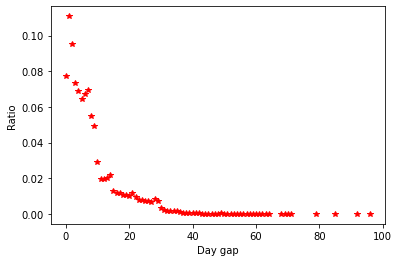

In [31]:
serie_dayGap = dftrain[dftrain.day_gap >= 0]["day_gap"].value_counts()/dftrain[dftrain.day_gap >= 0]["day_gap"].count()

plt.plot(serie_dayGap.index, serie_dayGap.values, linestyle="None", marker = "*", color = "r")
plt.xlabel("Day gap")
plt.ylabel("Ratio")
plt.show()

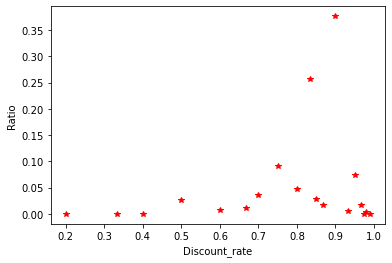

In [32]:
serie_discount = dftrain[dftrain.discount_rate >= 0]['discount_rate'].value_counts()/dftrain[dftrain.discount_rate >= 0]['discount_rate'].count()

plt.plot(serie_discount.index, serie_discount.values, linestyle="None", marker = "*", color = "r")
plt.xlabel("Discount_rate")
plt.ylabel("Ratio")
plt.show()

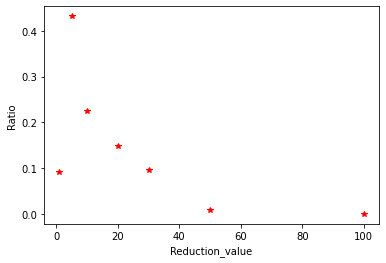

In [33]:
serie_reduction = dftrain[dftrain.reduction_value>0]['reduction_value'].value_counts()/dftrain[dftrain.reduction_value>0]['reduction_value'].count()

plt.plot(serie_reduction.index, serie_reduction.values, linestyle="None", marker = "*", color = "r")
plt.xlabel("Reduction_value")
plt.ylabel("Ratio")
plt.show()

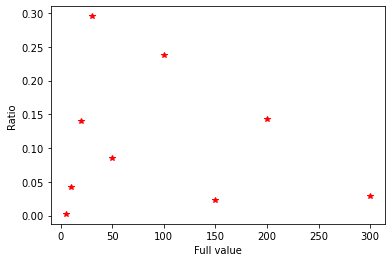

In [34]:
serie_full = dftrain[dftrain.full_value>0]['full_value'].value_counts()/dftrain[dftrain.full_value>0]['full_value'].count()

plt.plot(serie_full.index, serie_full.values, linestyle="None", marker = "*", color = "r")
plt.xlabel("Full value")
plt.ylabel("Ratio")
plt.show()

In [35]:
dftrain['if_fd'].value_counts()

1    1020010
0     734874
Name: if_fd, dtype: int64

In [36]:
dftrain['label'].value_counts()/dftrain['label'].count()

 0    0.557245
-1    0.406060
 1    0.036695
Name: label, dtype: float64

0.036695 positive label

In [37]:
dftest.head()

,user_id,merchant_id,coupon_id,discount_rate,distance,date_received,if_fd,full_value,reduction_value
0,4129537,450,9983,0.833333,1,20160712,1,30,5
1,6949378,1300,3429,0.833333,-1,20160706,1,30,5
2,2166529,7113,6928,0.900000,5,20160727,1,200,20
3,2166529,7113,1808,0.900000,5,20160727,1,100,10
4,6172162,7605,6500,0.966667,2,20160708,1,30,1


In [38]:
dftest.describe()

,discount_rate,distance,date_received,if_fd,full_value,reduction_value
count,113640.000000,113640.000000,1.136400e+05,113640.000000,113640.000000,113640.000000
mean,0.850671,1.974736,2.016072e+07,0.977420,43.396507,6.089141
std,0.063551,3.248809,9.019508e+00,0.148561,44.239815,5.640310
min,0.333333,-1.000000,2.016070e+07,0.000000,-1.000000,-1.000000
25%,0.833333,0.000000,2.016071e+07,1.000000,30.000000,5.000000
50%,0.833333,1.000000,2.016072e+07,1.000000,30.000000,5.000000
75%,0.900000,3.000000,2.016072e+07,1.000000,30.000000,5.000000
max,0.990000,10.000000,2.016073e+07,1.000000,500.000000,100.000000


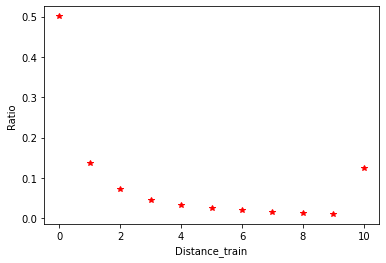

In [39]:
serie_train = dftrain[dftrain.distance >= 0]['distance'].value_counts()/dftrain[dftrain.distance >= 0]['distance'].count()

plt.plot(serie_train.index, serie_train.values, linestyle="None", marker = "*", color = "r")
plt.xlabel("Distance_train")
plt.ylabel("Ratio")
plt.show()

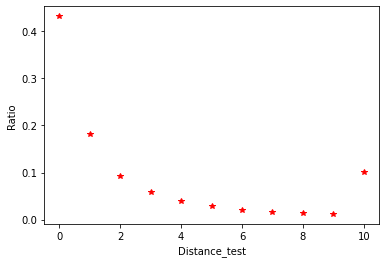

In [40]:
serie_test = dftest[dftest.distance >= 0]['distance'].value_counts()/dftest[dftest.distance >= 0]['distance'].count()

plt.plot(serie_test.index, serie_test.values, linestyle="None", marker = "*", color = "r")
plt.xlabel("Distance_test")
plt.ylabel("Ratio")
plt.show()

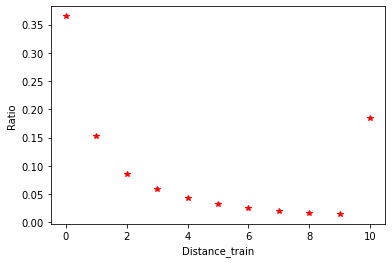

In [41]:
# positive labels
serie_train_label = dftrain[(dftrain.label >= 0)&(dftrain.distance >= 0)]['distance'].value_counts()/dftrain[(dftrain.label >= 0)&(dftrain.distance >= 0)]['distance'].count()

plt.plot(serie_train_label.index, serie_train_label.values, linestyle="None", marker = "*", color = "r")
plt.xlabel("Distance_train")
plt.ylabel("Ratio")
plt.show()

In [42]:
print ('Offline training set, ratio of full reduction promotion')
dftrain.if_fd.value_counts() / dftrain.if_fd.count()

Offline training set, ratio of full reduction promotion


1    0.581241
0    0.418759
Name: if_fd, dtype: float64

In [43]:
print ('Testing set, ratio of full reduction promotion')
dftest.if_fd.value_counts() / dftest.if_fd.count()

Testing set, ratio of full reduction promotion


1    0.97742
0    0.02258
Name: if_fd, dtype: float64